In [1]:
!pip install pillow numpy opencv-python matplotlib -q

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import cv2
import textwrap

from PIL import ImageEnhance

In [33]:
# Source: https://github.com/rroy1212/Image_Steganography/blob/master/ImageSteganography.ipynb

def hideData(image, secret_message):
    # calculate the maximum bytes to encode
    n_bytes = image.shape[0] * image.shape[1] * 3 // 8

    #Check if the number of bytes to encode is less than the maximum bytes in the image
    if len(secret_message) > n_bytes:
            raise ValueError("Error encountered insufficient bytes, need bigger image or less data !!")
    
    secret_message += "#####" # you can use any string as the delimeter

    data_index = 0
    # convert input data to binary format using messageToBinary() fucntion
    binary_secret_msg = messageToBinary(secret_message)

    data_len = len(binary_secret_msg) #Find the length of data that needs to be hidden
    for values in image:
            for pixel in values:
                    # convert RGB values to binary format
                    r, g, b = messageToBinary(pixel)
                    # modify the least significant bit only if there is still data to store
                    if data_index < data_len:
                            # hide the data into least significant bit of red pixel
                            pixel[0] = int(r[:-1] + binary_secret_msg[data_index], 2)
                            data_index += 1
                    if data_index < data_len:
                            # hide the data into least significant bit of green pixel
                            pixel[1] = int(g[:-1] + binary_secret_msg[data_index], 2)
                            data_index += 1
                    if data_index < data_len:
                            # hide the data into least significant bit of  blue pixel
                            pixel[2] = int(b[:-1] + binary_secret_msg[data_index], 2)
                            data_index += 1
                    # if data is encoded, just break out of the loop
                    if data_index >= data_len:
                            break

    return image

def messageToBinary(message):
    if type(message) == str:
        return ''.join([ format(ord(i), "08b") for i in message ])
    elif type(message) == bytes or type(message) == np.ndarray:
        return [ format(i, "08b") for i in message ]
    elif type(message) == int or type(message) == np.uint8:
        return format(message, "08b")
    else:
        raise TypeError("Input type not supported")

def showData(image):

    binary_data = ""
    for values in image:
            for pixel in values:
                    r, g, b = messageToBinary(pixel) #convert the red,green and blue values into binary format
                    binary_data += r[-1] #extracting data from the least significant bit of red pixel
                    binary_data += g[-1] #extracting data from the least significant bit of red pixel
                    binary_data += b[-1] #extracting data from the least significant bit of red pixel
    # split by 8-bits
    all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
    # convert from bits to characters
    decoded_data = ""
    for byte in all_bytes:
            decoded_data += chr(int(byte, 2))
            if decoded_data[-5:] == "#####": #check if we have reached the delimeter which is "#####"
                    break
    #print(decoded_data)
    return decoded_data[:-5] #remove the delimeter to show the original hidden message



### MSB based Steganography

# def hideData(image, secret_message):
#     # calculate the maximum bytes to encode
#     n_bytes = image.shape[0] * image.shape[1] * 3 // 8

#     #Check if the number of bytes to encode is less than the maximum bytes in the image
#     if len(secret_message) > n_bytes:
#             raise ValueError("Error encountered insufficient bytes, need bigger image or less data !!")
    
#     secret_message += "#####" # you can use any string as the delimeter

#     data_index = 0
#     # convert input data to binary format using messageToBinary() fucntion
#     binary_secret_msg = messageToBinary(secret_message)

#     data_len = len(binary_secret_msg) #Find the length of data that needs to be hidden
#     for values in image:
#             for pixel in values:
#                     # convert RGB values to binary format
#                     r, g, b = messageToBinary(pixel)
#                     # modify the least significant bit only if there is still data to store
#                     if data_index < data_len:
#                             # hide the data into least significant bit of red pixel
#                             pixel[0] = int(binary_secret_msg[data_index] + r[1:], 2)
#                             data_index += 1
#                     if data_index < data_len:
#                             # hide the data into least significant bit of green pixel
#                             pixel[1] = int(binary_secret_msg[data_index] + g[1:], 2)
#                             data_index += 1
#                     if data_index < data_len:
#                             # hide the data into least significant bit of  blue pixel
#                             pixel[2] = int(binary_secret_msg[data_index] + b[1:], 2)
#                             data_index += 1
#                     # if data is encoded, just break out of the loop
#                     if data_index >= data_len:
#                             break

#     return image

# def messageToBinary(message):
#     if type(message) == str:
#         return ''.join([ format(ord(i), "08b") for i in message ])
#     elif type(message) == bytes or type(message) == np.ndarray:
#         return [ format(i, "08b") for i in message ]
#     elif type(message) == int or type(message) == np.uint8:
#         return format(message, "08b")
#     else:
#         raise TypeError("Input type not supported")

# def showData(image):

#     binary_data = ""
#     for values in image:
#             for pixel in values:
#                     r, g, b = messageToBinary(pixel) #convert the red,green and blue values into binary format
#                     binary_data += r[0] #extracting data from the least significant bit of red pixel
#                     binary_data += g[0] #extracting data from the least significant bit of red pixel
#                     binary_data += b[0] #extracting data from the least significant bit of red pixel
#     # split by 8-bits
#     all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
#     # convert from bits to characters
#     decoded_data = ""
#     for byte in all_bytes:
#             decoded_data += chr(int(byte, 2))
#             if decoded_data[-5:] == "#####": #check if we have reached the delimeter which is "#####"
#                     break
#     #print(decoded_data)
#     return decoded_data[:-5] #remove the delimeter to show the original hidden message

In [34]:
text = "Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum. \
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, \
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo \
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse \
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non \
proident, sunt in culpa qui officia deserunt mollit anim id est laborum."

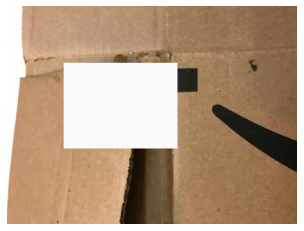

In [13]:
image = cv2.imread('dataset/dataset-resized/cardboard/cardboard19.jpg')
cv2.rectangle(image, (100,100), (300,250), (250,250,250), -1)

# cv2.imshow("Blue Line", image)
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

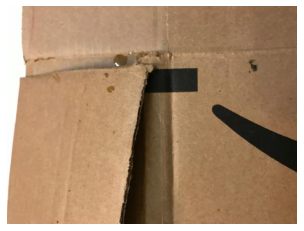

In [19]:
from PIL import Image

image = Image.open('dataset/dataset-resized/cardboard/cardboard19.jpg')
plt.axis("off")
plt.imshow(image)
plt.show()

In [53]:
image_antialiased = image.resize((300,300), Image.ANTIALIAS)

image_resized = image.resize((300, 300))
image_occulted = np.array(image_resized).copy()
cv2.rectangle(image_occulted, (80,80), (190,210), (250,250,250), -1)

brightened_img = ImageEnhance.Brightness(image_resized).enhance(1.5)
# brightened_img = brightness_filter.filter(1.5)


darkened_img = ImageEnhance.Brightness(image_resized).enhance(0.5)
# brightened_img = brightness_filter.filter(1.5)


# image_steganographed = np.array(image_resized).copy()
# image_steganographed = hideData(image_steganographed, "The best thing about a boolean is even if you are wrong, you are only off by a bit.")
# showData(image_steganographed)

image_steganographed = np.array(image_resized).copy()
image_steganographed = hideData(image_steganographed, text)
text == showData(image_steganographed)

True

In [47]:
image_pixelated = image_resized.resize((100,100), resample = Image.BILINEAR)

# Scale back up using NEAREST to original size
image_pixelated = image_pixelated.resize((300, 300), Image.NEAREST)

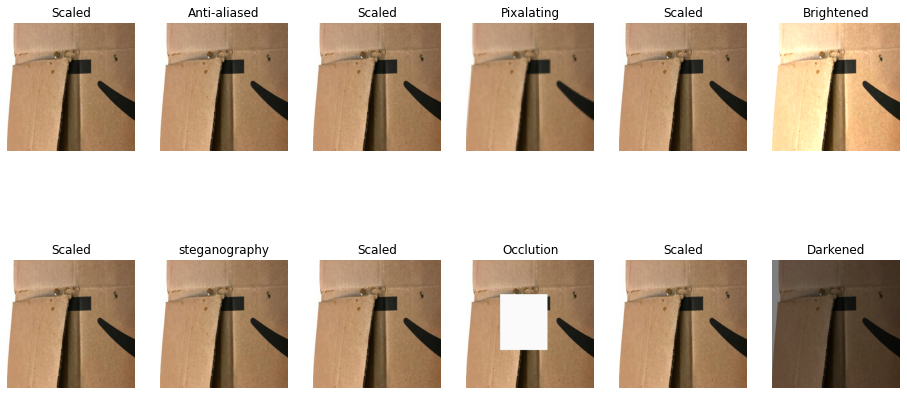

In [55]:
fig, axs = plt.subplots(2, 6, figsize=(16, 8))
axs[0][0].imshow(image_resized)
axs[0][0].title.set_text("Scaled")
axs[0][0].axis("off")

axs[0][1].imshow(image_antialiased)
axs[0][1].title.set_text("Anti-aliased")
axs[0][1].axis("off")


axs[1][0].imshow(image_resized)
axs[1][0].title.set_text("Scaled")
axs[1][0].axis("off")

axs[1][1].imshow(image_steganographed)
axs[1][1].title.set_text("steganography")
axs[1][1].axis("off")



axs[0][2].imshow(image_resized)
axs[0][2].title.set_text("Scaled")
axs[0][2].axis("off")

axs[0][3].imshow(image_pixelated)
axs[0][3].title.set_text("Pixalating")
axs[0][3].axis("off")


axs[1][2].imshow(image_resized)
axs[1][2].title.set_text("Scaled")
axs[1][2].axis("off")

axs[1][3].imshow(image_occulted)
axs[1][3].title.set_text("Occlution")
axs[1][3].axis("off")

axs[0][4].imshow(image_resized)
axs[0][4].title.set_text("Scaled")
axs[0][4].axis("off")

axs[0][5].imshow(brightened_img)
axs[0][5].title.set_text("Brightened")
axs[0][5].axis("off")


axs[1][4].imshow(image_resized)
axs[1][4].title.set_text("Scaled")
axs[1][4].axis("off")

axs[1][5].imshow(darkened_img)
axs[1][5].title.set_text("Darkened")
axs[1][5].axis("off")

plt.show()